In [1]:
#Required Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [4]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497, 1)


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [6]:
X.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
y.head(5)

,quality
0,5
1,5
2,5
3,6
4,5


In [8]:
X.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile_acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric_acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual_sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free_sulfur_dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total_sulfur_dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


In [9]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

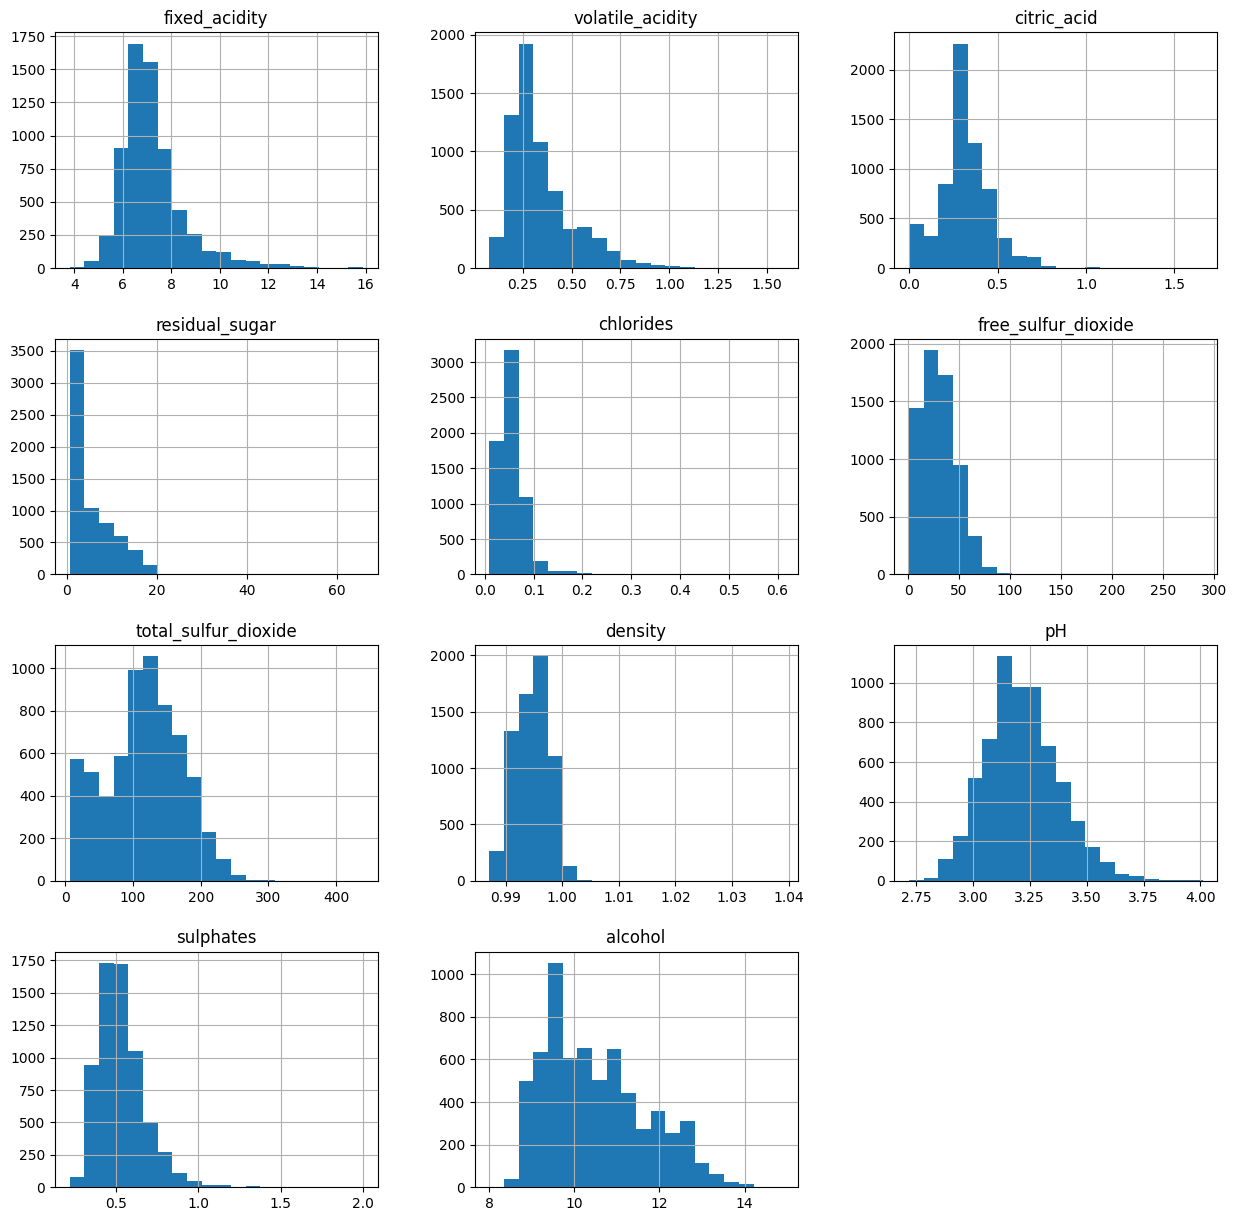

In [10]:
X.hist(bins=20, figsize=(15, 15))

In [11]:
y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


array([[<Axes: title={'center': 'quality'}>]], dtype=object)

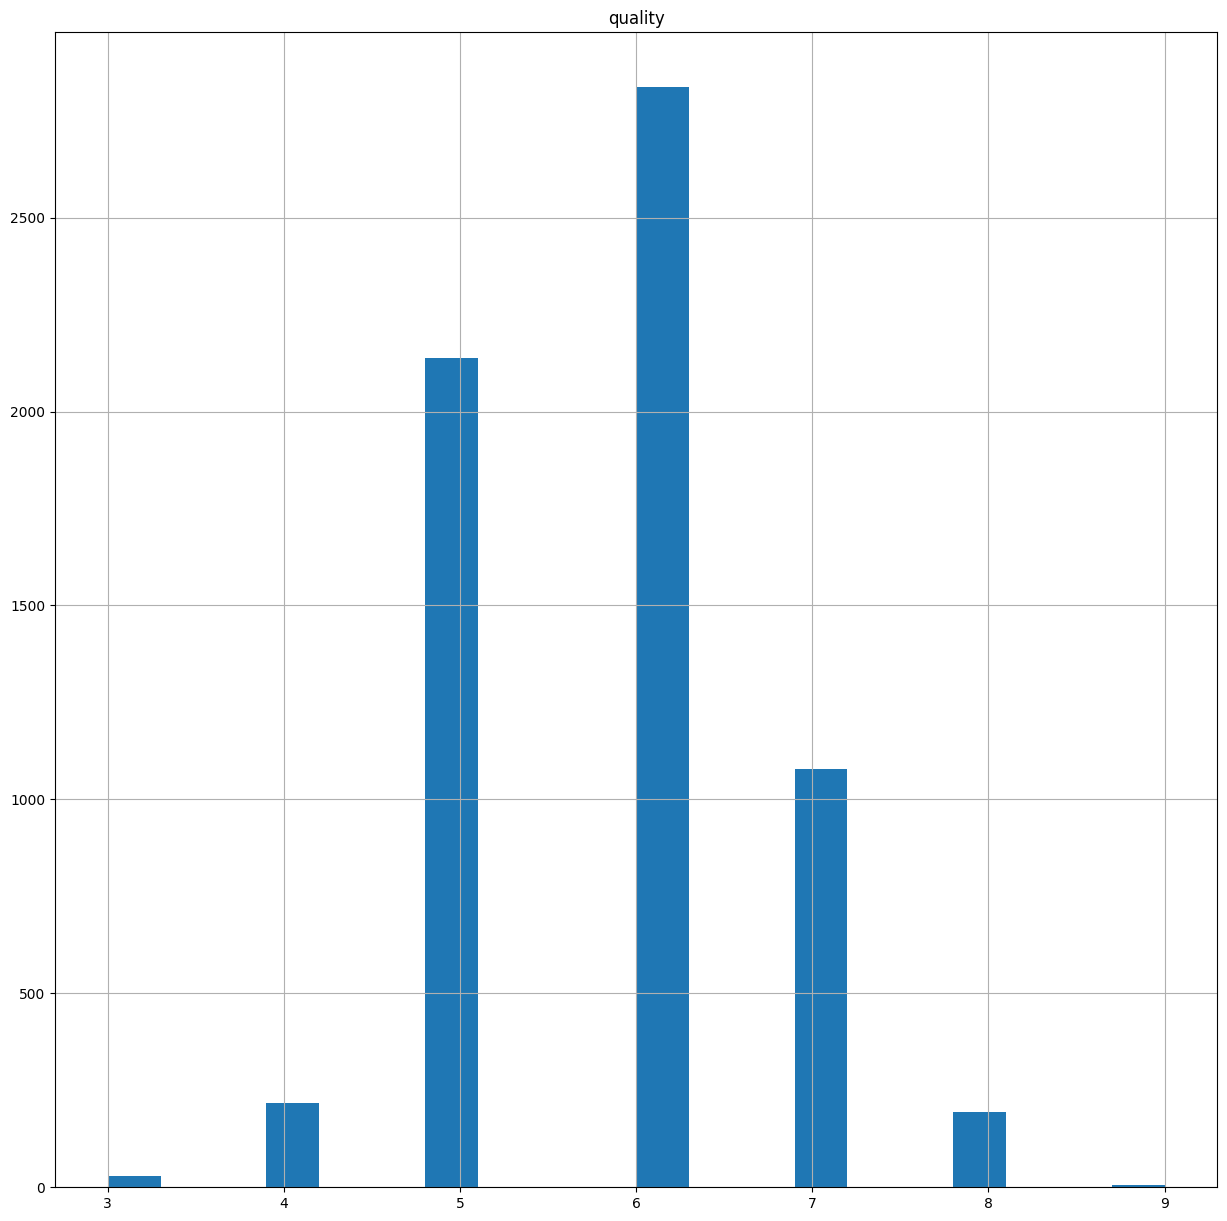

In [12]:
y.hist(bins=20, figsize=(15, 15))

In [13]:
#Missing Values

print(X.isnull().sum().sort_values(ascending=False).to_string())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0


In [14]:
print(y.isnull().sum().sort_values(ascending=False).to_string())

quality    0


In [15]:
#Scaling X Variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_rescaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(df_rescaled.head(5))

print(df_rescaled.describe())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol  
0  0.202899  
1  0.260870  
2  0.260870  


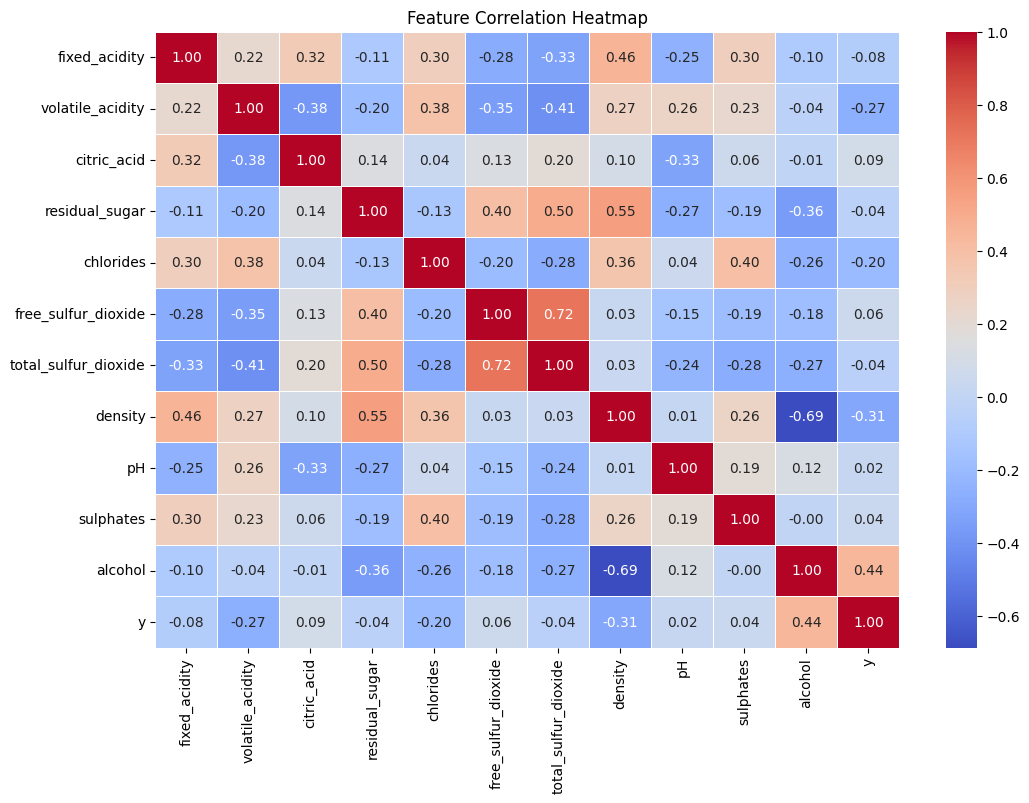

In [16]:
#Correlation Matrix

data_clean = df_rescaled.copy()
data_clean["y"] = y


corr_matrix = data_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:

y = y.iloc[:, 0].ravel()

<ipython-input-73-cde70874015d>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.iloc[:, 0].ravel()


In [17]:
#Splitting Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_rescaled, y, test_size=0.25, random_state=7)

print('Shape of training data :',X_train.shape)
print('Shape of testing data :',y_test.shape)

Shape of training data : (4872, 11)
Shape of testing data : (1625, 1)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier



model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=100))

model.fit(X_train, y_train)

# Predictions on the train data
predict_train = model.predict(X_train)
print('\nTarget on train data:\n', predict_train)

# Accuracy on the train data
accuracy_train = accuracy_score(y_train, predict_train)
print('\nAccuracy score on train dataset: ', accuracy_train)

# Predictions on the test data
predict_test = model.predict(X_test)
print('\nTarget on test data:\n', predict_test)

# Accuracy
accuracy_test = accuracy_score(y_test, predict_test)
print('\nAccuracy score on test dataset: ', accuracy_test)



Target on train data:
 [6 5 5 ... 5 6 6]

Accuracy score on train dataset:  0.5365353037766831

Target on test data:
 [6 6 5 ... 6 5 5]

Accuracy score on test dataset:  0.5372307692307692


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        51
           5       0.58      0.65      0.62       508
           6       0.51      0.73      0.60       724
           7       0.71      0.04      0.07       279
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1625
   macro avg       0.26      0.20      0.18      1625
weighted avg       0.53      0.54      0.47      1625



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[  0   0   3   2   0   0   0]
 [  0   0  25  26   0   0   0]
 [  0   0 331 177   0   0   0]
 [  0   0 190 532   2   0   0]
 [  0   0  12 257  10   0   0]
 [  0   0   5  49   2   0   0]
 [  0   0   0   2   0   0   0]]


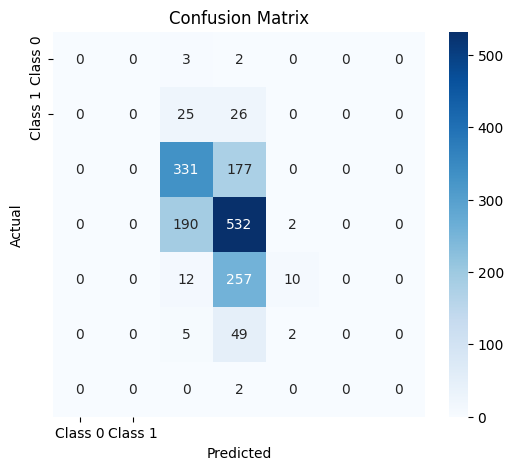

In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
import pickle

model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=100))

model.fit(X_train, y_train)

with open('LogisticModel.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [25]:
from google.colab import files
files.download('LogisticModel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>